# Исследование данных с полуфинала #

### Что тут можно предпринять? ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
train = pd.read_excel('semifinal_data/train.xlsx')
test = pd.read_excel('semifinal_data/test.xlsx')
descr = pd.read_excel('semifinal_data/description.xlsx')

## Описание данных ##

In [14]:
descr.head(3)

,Название поля,Описание
0,Water_(g),Water (g/100 g)
1,Protein_(g),Protein (g/100 g)
2,Lipid_Tot_(g),Total lipid (fat)(g/100 g)


In [13]:
print('Число столбцов в трейне: ', train.shape[1])
print('Число столбцов в тесте: ', test.shape[1])
print('Число строк в описании: ', descr.shape[0])

Число столбцов в трейне:  52
Число столбцов в тесте:  51
Число строк в описании:  50


У нас есть два признака, лишенных описания. Что же это?

In [18]:
train_feat = set(train.columns)
test_feat = set(test.columns)
descr_feat = set(descr['Название поля'])

print('Есть в описании, нет в трейне: ', descr_feat.difference(train_feat))
print('Есть в описании, нет в тесте: ', descr_feat.difference(test_feat))
print('Есть в трейне, нет в описании: ', train_feat.difference(descr_feat))
print('Есть в тесте, нет в описании: ', test_feat.difference(descr_feat))
print('Есть в трейне, нет в тесте: ', train_feat.difference(test_feat))
print('Есть в тесте, нет в трейне: ', test_feat.difference(train_feat))

Есть в описании, нет в трейне:  set()
Есть в описании, нет в тесте:  set()
Есть в трейне, нет в описании:  {'Energ_Kcal', 'Shrt_Desc'}
Есть в тесте, нет в описании:  {'Shrt_Desc'}
Есть в трейне, нет в тесте:  {'Energ_Kcal'}
Есть в тесте, нет в трейне:  set()


Итак, все фичи кроме названия продукта и целевой переменной имеют свое описание. Без странностей.

Посмотрим на описание фичей.

In [25]:
pd.set_option('display.max_columns', None)  
descr

,Название поля,Описание
0,Water_(g),Water (g/100 g)
1,Protein_(g),Protein (g/100 g)
2,Lipid_Tot_(g),Total lipid (fat)(g/100 g)
3,Ash_(g),Ash (g/100 g)
4,Carbohydrt_(g),Carbohydrate by difference (g/100 g)
5,Fiber_TD_(g),Total dietary fiber (g/100 g)
6,Sugar_Tot_(g),Total sugars (g/100 g)
7,Calcium_(mg),Calcium (mg/100 g)
8,Iron_(mg),Iron (mg/100 g)
9,Magnesium_(mg),Magnesium (mg/100 g)


In [28]:
descr.set_index('Название поля').index

Index(['Water_(g)', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'Calcium_(mg)',
       'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',
       'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)',
       'Selenium_(µg)', 'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)',
       'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)', 'Folate_Tot_(µg)',
       'Folic_Acid_(µg)', 'Food_Folate_(µg)', 'Folate_DFE_(µg)',
       'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU', 'Vit_A_RAE',
       'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object', name='Название поля')

In [39]:
print(descr[descr['Название поля'] == 'GmWt_1']['Описание'])

45    First household weight for this item from the 
Name: Описание, dtype: object


Итак, большинство признаков - это просто содержание определенных элементов в продукте на 100 грамм. Выбиваются только последние несколько.
* GmWt_1 - здесь вообще описание не дописано. Хрен знает, что оно вообще значит. Кажется, оно должно быть таким же как в GmWt_2, но это не особо вносит понимание.
* GmWt_2, GmWt_Desc1, GmWt_Desc2 - это что вообще? Непонятно.
* Refuse_Pct - процент отказов от чего?

In [41]:
train[['GmWt_1', 'GmWt_2', 'GmWt_Desc1', 'GmWt_Desc2', 'Refuse_Pct']].head(5)

,GmWt_1,GmWt_2,GmWt_Desc1,GmWt_Desc2,Refuse_Pct
0,2.0,15.0,1 tbsp,.5 oz,0.0
1,146.0,33.0,1 cup,1 piece,0.0
2,89.0,85.0,1 thigh,"1 serving, (3 oz)",29.0
3,140.0,85.0,1 cup,3 oz,27.0
4,14.0,238.0,1 tbsp,1 cup,0.0


Похоже, что GmWt_Desc1 и GmWt_Desc2 - это порции? неясно

## Смотрим на данные ##

In [46]:
print('Размер трейна: ', train.shape)
train.head()

Размер трейна:  (7756, 52)


,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,393,12.00,6.00,3.90,73.40,5.2,13.75,651.0,47.50,118.0,444.0,731.0,6.0,1.90,0.391,NaN,20.5,4.7,3.600,3.710,20.110,NaN,0.423,19.0,0.0,19.0,19.0,28.7,0.22,69.0,3.0,0.0,27.0,28.0,0.0,0.0,157.0,5.00,0.0,0.0,3.0,1.267,1.429,2.186,0.0,2.0,1 tbsp,15.0,.5 oz,0.0
1,"HEARTS OF PALM,CANNED",90.20,28,2.52,0.62,2.04,4.62,2.4,NaN,58.0,3.13,38.0,65.0,177.0,426.0,1.15,0.133,1.394,0.7,7.9,0.011,0.057,0.437,0.126,0.022,39.0,0.0,39.0,39.0,NaN,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.130,0.103,0.202,0.0,146.0,1 cup,33.0,1 piece,0.0
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD,ROTISSERIE,OR",63.89,196,24.06,11.09,1.56,0.00,0.0,0.00,13.0,0.97,21.0,217.0,264.0,337.0,2.01,0.084,0.018,27.0,0.0,0.055,0.233,5.433,1.262,0.176,12.0,0.0,12.0,12.0,67.9,0.45,45.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.25,NaN,NaN,0.0,2.866,4.878,1.673,130.0,89.0,1 thigh,85.0,"1 serving, (3 oz)",29.0
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,280,20.43,21.35,3.51,0.00,0.0,0.00,10.0,0.95,14.0,221.0,258.0,1072.0,2.51,0.113,0.024,33.6,0.0,0.612,0.190,4.127,0.559,0.280,3.0,0.0,3.0,3.0,79.8,0.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.7,29.0,0.0,7.670,10.140,2.320,58.0,140.0,1 cup,85.0,3 oz,27.0
4,"VINEGAR,DISTILLED",94.78,18,0.00,0.00,0.02,0.04,0.0,0.04,6.0,0.03,1.0,4.0,2.0,2.0,0.01,0.006,0.055,0.5,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,14.0,1 tbsp,238.0,1 cup,0.0


In [47]:
print('Размер теста: ', test.shape)
test.head()

Размер теста:  (862, 51)


,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,SILK KEY LIME SOY YOGURT,77.59,2.35,1.18,1.24,17.65,0.6,12.35,176.0,0.64,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,17.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,170.0,1 container,NaN,NaN,0.0
1,"FAST FOODS,SALAD,VEG,TOSSED,WO/DRSNG",95.51,1.25,0.07,0.53,3.22,NaN,NaN,13.0,0.63,11.0,39.0,172.0,26.0,0.21,0.050,0.147,0.4,23.2,0.030,0.050,0.550,0.120,0.080,37.0,0.0,37.0,37.0,NaN,0.0,1136.0,57.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010,0.004,0.034,0.0,104.0,.75 cup,207.0,1.5 cup,0.0
2,"CUTTLEFISH,MXD SP,CKD,MOIST HEAT",61.12,32.48,1.40,3.36,1.64,0.0,NaN,180.0,10.84,60.0,580.0,637.0,744.0,3.46,0.998,0.209,89.6,8.5,0.017,1.729,2.189,0.900,0.270,24.0,0.0,24.0,24.0,NaN,5.4,675.0,203.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.236,0.162,0.268,224.0,85.0,3 oz,NaN,NaN,0.0
3,"GROUND TURKEY,93% LN,7% FAT,RAW",72.63,18.73,8.34,0.92,0.00,0.0,0.00,21.0,1.17,21.0,193.0,213.0,69.0,2.53,0.107,0.008,19.0,0.0,0.067,0.185,5.417,1.000,0.350,7.0,0.0,7.0,7.0,53.0,1.2,73.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.11,0.4,14.0,0.0,2.170,2.843,2.537,74.0,28.0,1 oz,453.0,1 lb,0.0
4,"TURKEY,RTL PARTS,ENHANCED,BREAST,MEAT ONLY,CKD,RSTD",69.99,27.94,2.08,1.40,0.00,0.0,0.00,15.0,0.59,27.0,219.0,264.0,184.0,1.33,0.057,0.006,28.9,0.0,0.045,0.195,11.500,0.965,0.734,9.0,0.0,9.0,9.0,74.0,0.3,8.0,3.0,3.0,0.0,0.0,0.0,0.0,5.0,0.08,0.1,6.0,0.0,0.428,0.670,0.668,74.0,85.0,3 oz,852.0,1 breast,24.0


Ну хоть данных достаточно много.

### Названия продуктов ###

In [45]:
train['Shrt_Desc'][:10]

0    BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY                          
1    HEARTS OF PALM,CANNED                                       
2    CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD,ROTISSERIE,OR
3    PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD                     
4    VINEGAR,DISTILLED                                           
5    BEEF,NZ,IMP,TENDERLOIN,LN & FAT,RAW                         
6    MUFFINS,BLUEBERRY,PREP FROM RECIPE,MADE W/LOFAT (2%) MILK   
7    PHYLLO DOUGH                                                
8    TURKEY,LT OR DK MEAT,SMOKED,CKD,W/SKN,BONE REMOVED          
9    CEREALS RTE,QUAKER,SHREDDED WHEAT,BAGGED CRL                
Name: Shrt_Desc, dtype: object

Мда, названия офигенные, только нейросети на них обучай (сарказм). Можно, конечно, попробовать как-то их обработать, но я не очень понимаю как. Кажется, что для решения первой дополнительной задачи (про классификацию) они играют решающую роль, потому что иначе черт знает, что делать, но мне страшно с этим работать.

Посмотрим на то, сколько раз здесь встречается каждое слово.

In [61]:
names = list(train['Shrt_Desc'].values) + list(test['Shrt_Desc'].values)
names = [el.lower() for el in names]
names = [''.join([el if ord(el) >= 97 and ord(el) <= 122 else ' ' for el in one]) for one in names]
words = []
for el in names:
    words += el.split()
print(len(words))
words[:10]

59918


['babyfood',
 'crl',
 'oatmeal',
 'w',
 'bananas',
 'dry',
 'hearts',
 'of',
 'palm',
 'canned']

Построим график встречаемости слов:

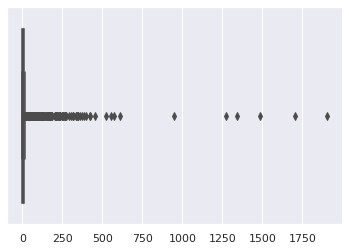

In [74]:
times = [el[1] for el in counter.items()]
sns.boxplot(times)

Да, как-то так себе. Некоторые слова прямо очень частые, но это редкость.

In [76]:
pd_times = pd.Series(times)
pd_times.describe()

count    3596.000000
mean     16.662403  
std      73.084618  
min      1.000000   
25%      1.000000   
50%      3.000000   
75%      8.000000   
max      1902.000000
dtype: float64

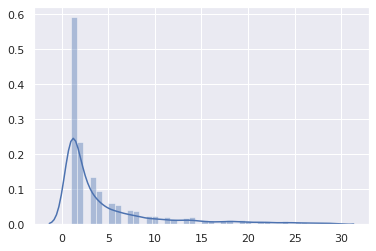

In [93]:
sns.distplot(pd_times[pd_times < 30])

Ну собственно да, среднее количество повторений слова - 16, но 75% вообще встречаются меньше 8 раз, а 50% - меньше 3. Больше всего, соответственно, появляются лишь один раз.

Что с этим делать - хз.

### Целевая переменная ###

In [85]:
train['Energ_Kcal'].describe()

count    7756.000000
mean     225.885250 
std      169.854878 
min      0.000000   
25%      91.000000  
50%      190.000000 
75%      336.000000 
max      902.000000 
Name: Energ_Kcal, dtype: float64

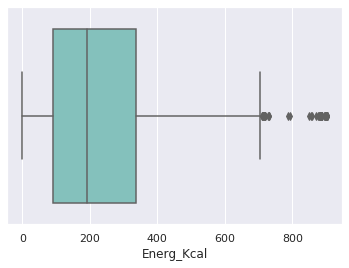

In [91]:
sns.boxplot(data = train, x = 'Energ_Kcal', palette = 'GnBu')

Здесь все выглядит довольно разумно.

### Что там по NaNам? ###

In [108]:
train.isna().sum().describe()

count    52.000000  
mean     1270.750000
std      1171.845869
min      0.000000   
25%      312.750000 
50%      668.000000 
75%      1928.750000
max      3661.000000
dtype: float64

Нормально у них тут с NaNами. Во всем трейне 8к строк, а число пропущенных значений в столбце доходит до 3.5к. Непорядок.

In [104]:
print('Лидирующие по NaNам столбцы:')
temp = train.isna().sum().sort_values(ascending=False)
temp[:10]

Лидирующие по NaNам столбцы:


Choline_Tot_ (mg)    3661
GmWt_Desc2           3439
GmWt_2               3439
Vit_K_(µg)           3281
Lut+Zea_ (µg)        3077
Lycopene_(µg)        3055
Beta_Crypt_(µg)      3032
Alpha_Carot_(µg)     3024
Vit_D_µg             2967
Vit_D_IU             2966
dtype: int64

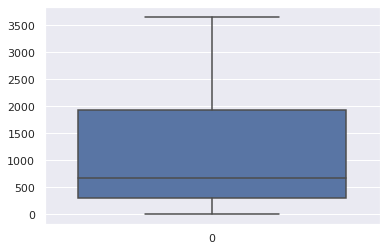

In [106]:
sns.boxplot(data=temp)

Ужас.